In [7]:
import tensorflow as tf

In [8]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul_1:0", shape=(4,), dtype=int32)


In [9]:
#Initilizing a Tensorflow session 

sess = tf.Session()
mnist = tf.keras.datasets.mnist

In [10]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 33s 3us/step


In [1]:
from __future__ import absolute_import, division, print_function  

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)


1.12.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

In [12]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

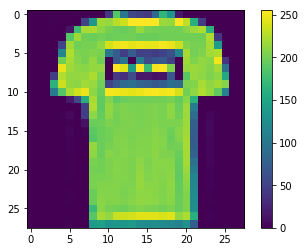

In [17]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images/255.0

test_images = test_images/255.0


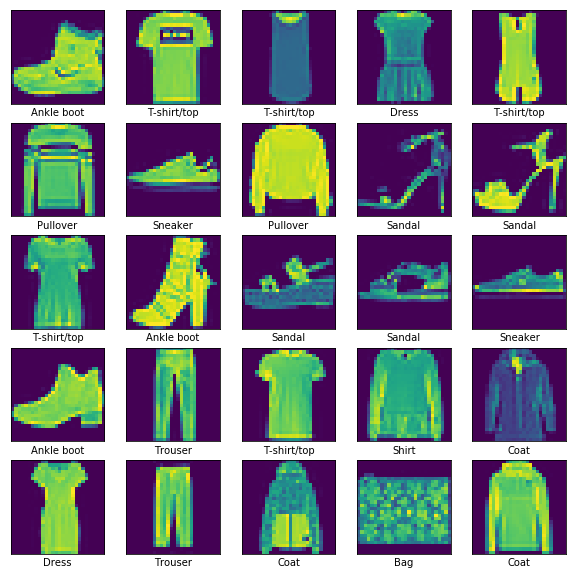

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [44]:
from tensorflow.keras import layers

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.4962 - acc: 0.8267
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3770 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.3399 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3144 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.2955 - acc: 0.8914


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.8696


In [49]:
predictions = model.predict(test_images)

In [50]:
predictions

array([[8.7405891e-07, 4.0780129e-08, 5.8770030e-07, ..., 2.0734262e-01,
        5.6140957e-06, 7.5940800e-01],
       [2.1578944e-05, 1.7156176e-11, 9.9592185e-01, ..., 8.6766298e-13,
        6.1522918e-08, 2.0498809e-12],
       [2.3812234e-07, 9.9999940e-01, 6.0281846e-10, ..., 5.9156735e-17,
        5.3856568e-09, 1.0992308e-13],
       ...,
       [1.1953330e-05, 5.2818855e-10, 1.0557825e-05, ..., 1.0433596e-09,
        9.9993575e-01, 4.1559048e-12],
       [1.2315165e-07, 9.9975961e-01, 1.9537325e-09, ..., 2.3213508e-12,
        8.5175088e-08, 1.3783705e-07],
       [6.0383445e-05, 9.2473448e-07, 7.5456635e-05, ..., 5.0546777e-02,
        5.6188286e-04, 4.5495781e-05]], dtype=float32)

In [51]:
predictions[0]

array([8.7405891e-07, 4.0780129e-08, 5.8770030e-07, 1.3959299e-06,
       6.0712546e-07, 3.3238068e-02, 2.2388351e-06, 2.0734262e-01,
       5.6140957e-06, 7.5940800e-01], dtype=float32)

In [54]:
test_labels[0]

9

In [55]:
np.argmax(predictions[0])

9

In [71]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:1.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


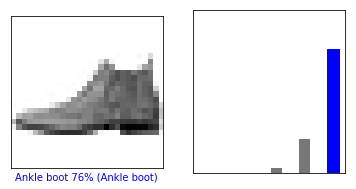

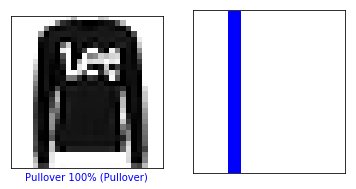

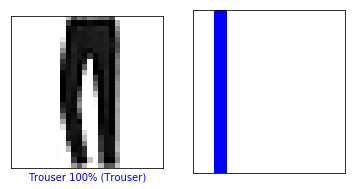

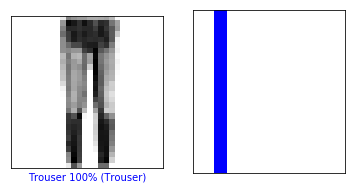

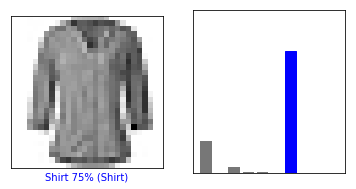

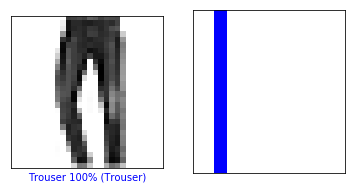

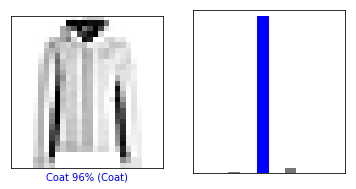

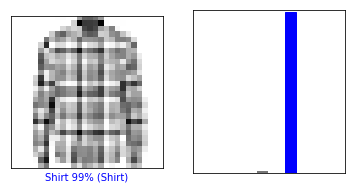

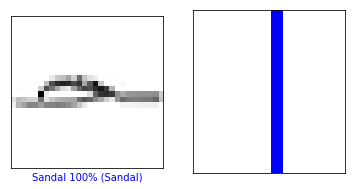

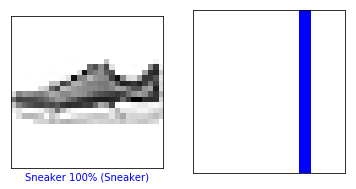

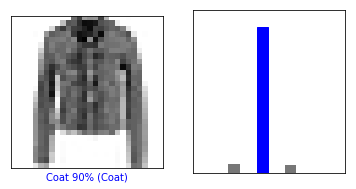

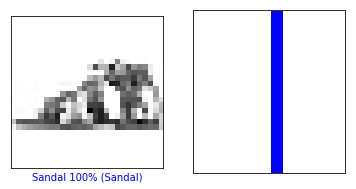

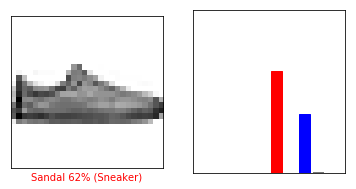

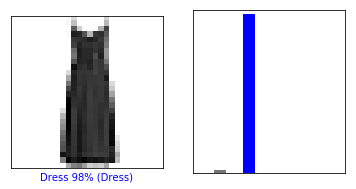

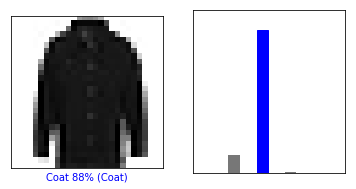

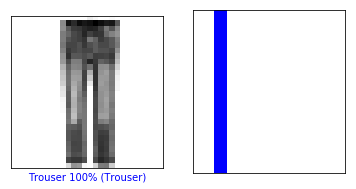

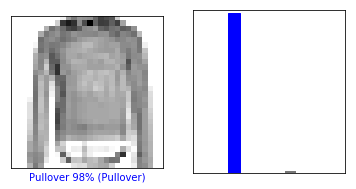

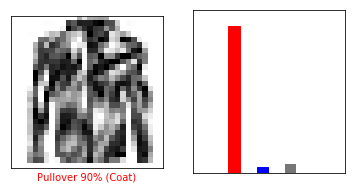

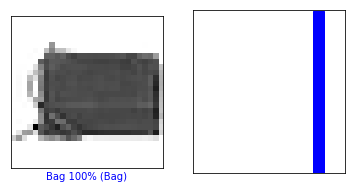

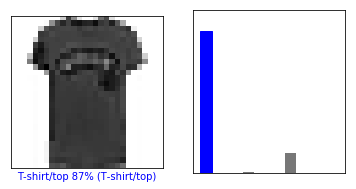

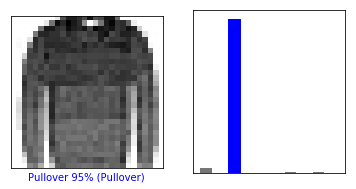

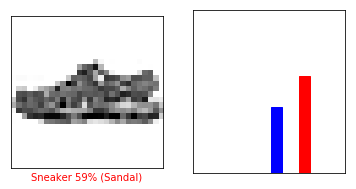

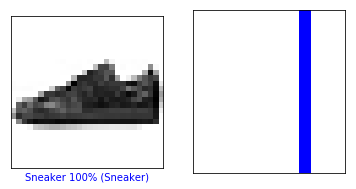

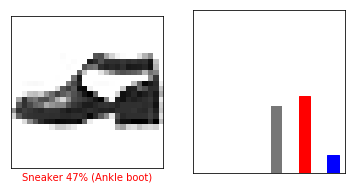

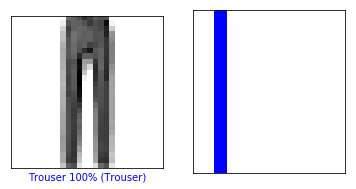

In [73]:
for i in range(25):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()
